In [2]:
# Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the student info into pandas dataframes
stud_info = pd.read_csv(r'C:\Users\Home\dataset\studentInfo.csv')

In [4]:
stud_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
stud_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


# Unique values in all columns except for student_id

In [6]:
# Iterate over the columns
for col in stud_info.columns:
  # Skip the id_student column
  if col == 'id_student':
    continue
  # Print the unique values in the column
  print(f'Unique values in column {col}: {stud_info[col].unique()}')

Unique values in column code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
Unique values in column code_presentation: ['2013J' '2014J' '2013B' '2014B']
Unique values in column gender: ['M' 'F']
Unique values in column region: ['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
Unique values in column highest_education: ['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']
Unique values in column imd_band: ['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']
Unique values in column age_band: ['55<=' '35-55' '0-35']
Unique values in column num_of_prev_attempts: [0 1 2 4 3 5 6]
Unique values in column studied_credits: [240  60 120  90 150 180 345 420 170  80  75 300 330 210 270 360 135  70
 225 585 325 130

In [21]:
stud_info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [7]:
stud_info=stud_info.dropna()
stud_info.shape

(31482, 12)

In [8]:
stud_info.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


# Preprocessing dataset

Mapping the values in the imd_band column to integer values, with the mapping specified in a dictionary.

Replacing the values in the gender column with integer values, using the mapping 'M': 0, 'F': 1.

Replacing the values in the highest_education column with integer values, using the mapping specified in a dictionary.

Replacing the values in the age_band column with integer values, using the mapping '0-35': 0, '35-55': 1, '55<=': 2. 

Changing the data type of the num_of_prev_attempts and studied_credits columns to np.int32.

Replacing the values in the disability column with integer values, using the mapping 'N': 0, 'Y': 1.

Setting the index of the dataframe to the columns code_module, code_presentation, and id_student.

Displaying the first five rows of the dataframe using the head() function.

In [9]:
import numpy as np
# change 0-10% -->10, 0-20% -->20, 20-30% -->30 ...
stud_info.imd_band=stud_info.imd_band.replace({'0-10%':10,
                                                '10-20':20,
                                                 '20-30%':30,
                                                 '30-40%':40,
                                                 '40-50%':50,
                                                 '50-60%':60,
                                                 '60-70%':70,
                                                 '70-80%':80,
                                                 '80-90%':90,
                                                 '90-100%':100}).astype(np.int32)

    
# replace M:0, F:1
stud_info.gender=stud_info.gender.replace({'M':0,'F':1}).astype(np.int32)
    
# ordinize the highest_education
# No Formal quals:0
# Lower than A Level:1
# A Level or Equivalent:2
# HE Qualification:3
# Post Graduate Qualification:4
stud_info.highest_education=stud_info.highest_education.replace({'No Formal quals':0,
                                                                   'Lower Than A Level':1,
                                                                   'A Level or Equivalent':2,
                                                                   'HE Qualification':3,
                                                                   'Post Graduate Qualification':4})
    
# ordinize the age_band 0-35:0, 35-55:1, 55<=:2; As we focus on the normal students, those older than 55 will be exclude
stud_info.age_band=stud_info.age_band.replace({'0-35':0,
                                                 '35-55':1,
                                                 '55<=':2}).astype(np.int32)
stud_info=stud_info[stud_info.age_band<=1]
    
# change the data type of int64 into int32
stud_info.num_of_prev_attempts=stud_info.num_of_prev_attempts.astype(np.int32)
stud_info.studied_credits=stud_info.studied_credits.astype(np.int32)
    
# change the disability N:0 Y:1
stud_info.disability=stud_info.disability.replace({'N':0,'Y':1}).astype(np.int32)
stud_info=stud_info.set_index(['code_module','code_presentation','id_student'])
stud_info.head()

gender                region  \
code_module code_presentation id_student                                 
AAA         2013J             28400            1              Scotland   
                              30268            1  North Western Region   
                              31604            1     South East Region   
                              32885            1  West Midlands Region   
                              38053            0                 Wales   

                                          highest_education  imd_band  \
code_module code_presentation id_student                                
AAA         2013J             28400                       3        30   
                              30268                       2        40   
                              31604                       2        60   
                              32885                       1        60   
                              38053                       2        90   

                                          age_band  num_of_prev_attempts  \
code_module code_presentation id_student                                   
AAA         2013J             28400              1                     0   
                              30268              1                     0   
                              31604              1                     0   
                              32885              0                     0   
                              38053              1                     0   

                                          studied_credits  disability  \
code_module code_presentation id_student                                
AAA         2013J             28400                    60           0   
                              30268                    60           1   
                              31604                    60           0   
                              32885                    60           0   
                              38053                    60           0   

                                         final_result  
code_module code_presentation id_student               
AAA         2013J             28400              Pass  
                              30268         Withdrawn  
                              31604              Pass  
                              32885              Pass  
                              38053              Pass

C:\Users\Home\AppData\Local\Temp\ipykernel_18244\2496495000.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.loc[:, 'final_result'] = pd.Categorical(plot_data['final_result'],
C:\Users\Home\AppData\Local\Temp\ipykernel_18244\2496495000.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.loc[:, 'gender'] = plot_data['gender'].replace({0: 'M', 1:'F'})


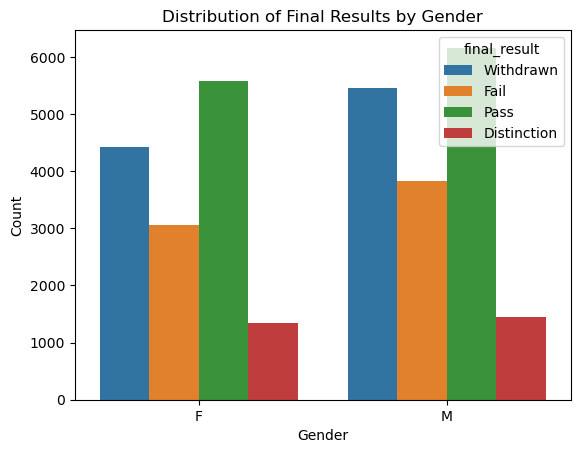

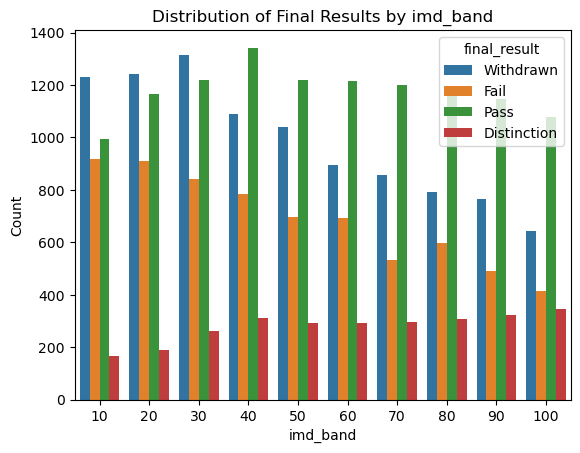

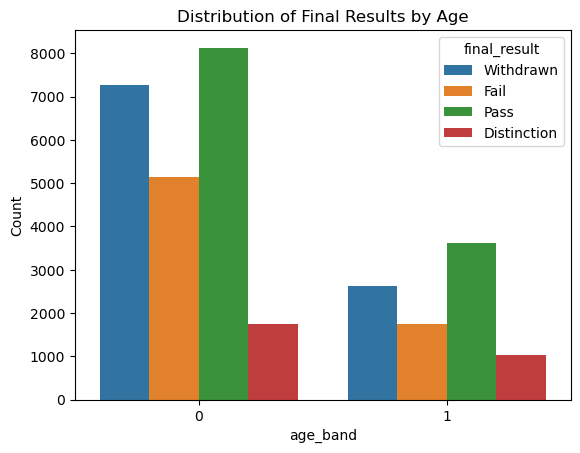

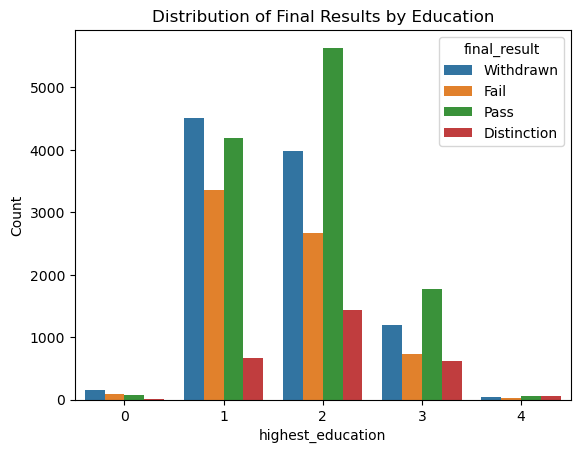

In [14]:
import seaborn as sns

# Select the columns to include in the plot
plot_data = stud_info[['gender', 'highest_education', 'final_result','imd_band','age_band']]

# Convert final_result values to numeric representation
plot_data.loc[:, 'final_result'] = pd.Categorical(plot_data['final_result'], 
                                                  categories=['Withdrawn', 'Fail', 'Pass', 'Distinction'], 
                                                  ordered=True)
# Map gender values to 0 and 1
plot_data.loc[:, 'gender'] = plot_data['gender'].replace({0: 'M', 1:'F'})
# Create a countplot with the hue parameter set to final_result
sns.countplot(x='gender', hue='final_result', data=plot_data)

# Set the plot title and labels
plt.title('Distribution of Final Results by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

sns.countplot(x='imd_band', hue='final_result', data=plot_data)

# Set the plot title and labels
plt.title('Distribution of Final Results by imd_band')
plt.xlabel('imd_band')
plt.ylabel('Count')

plt.show()

sns.countplot(x='age_band', hue='final_result', data=plot_data)

# Set the plot title and labels
plt.title('Distribution of Final Results by Age')
plt.xlabel('age_band')
plt.ylabel('Count')

plt.show()

sns.countplot(x='highest_education', hue='final_result', data=plot_data)

# Set the plot title and labels
plt.title('Distribution of Final Results by Education')
plt.xlabel('highest_education')
plt.ylabel('Count')

plt.show()

# Oberservations

By observing the data visulaizations we can draw the following inferences: 

Gender does not have a high significance on the final result

The imd_bands of 0-10, 10-20 and 20-30 have statistically higher chance of withdrawing and failing and low chances of distinction compared to rest of the band and hence are at the most risk.

Age does not have a high significance on the final result

People with A level of education or lower have higher chance of withdrawing and failing and hence it is also a risk factor

# Student performance prediction

In [10]:
# Load the student Vle data into pandas dataframes
stud_vle = pd.read_csv(r'C:\Users\Home\dataset\studentVle.csv')
stud_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [11]:
stud_vle = stud_vle.reset_index()
stud_info = stud_info.reset_index()
stud_vle = pd.merge(stud_vle, stud_info[['code_module', 'code_presentation', 'id_student', 'final_result']], 
                     on=['code_module', 'code_presentation', 'id_student'], how='left')
stud_vle.set_index(['code_module', 'code_presentation', 'id_student'])
stud_vle.head(2)

,index,code_module,code_presentation,id_student,id_site,date,sum_click,final_result
0,0,AAA,2013J,28400,546652,-10,4,Pass
1,1,AAA,2013J,28400,546652,-10,1,Pass


In [12]:
stud_vle.loc[:,'final_result']=stud_vle['final_result'].replace({'Withdrawn':0, 'Fail':0, 'Pass':1, 'Distinction':1})

In [13]:
stud_vle.isna().sum()

index                     0
code_module               0
code_presentation         0
id_student                0
id_site                   0
date                      0
sum_click                 0
final_result         728458
dtype: int64

In [14]:
stud_vle = stud_vle.dropna()

In [15]:
stud_vle['final_result'] = stud_vle['final_result'].astype(np.int64)

In [16]:
stud_vle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926822 entries, 0 to 10655279
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   index              int64 
 1   code_module        object
 2   code_presentation  object
 3   id_student         int64 
 4   id_site            int64 
 5   date               int64 
 6   sum_click          int64 
 7   final_result       int64 
dtypes: int64(6), object(2)
memory usage: 681.6+ MB


In [17]:
clicks_by_nonpass = stud_vle[stud_vle['final_result'] == 0].groupby('date')['sum_click'].sum().reset_index()
clicks_by_nonpass.head()

,date,sum_click
0,-25,3843
1,-24,3565
2,-23,2400
3,-22,1428
4,-21,776


In [18]:
clicks_by_pass = stud_vle[stud_vle['final_result'] == 1].groupby('date')['sum_click'].sum().reset_index()
clicks_by_pass.head()

,date,sum_click
0,-25,9095
1,-24,9970
2,-23,5747
3,-22,3333
4,-21,2326


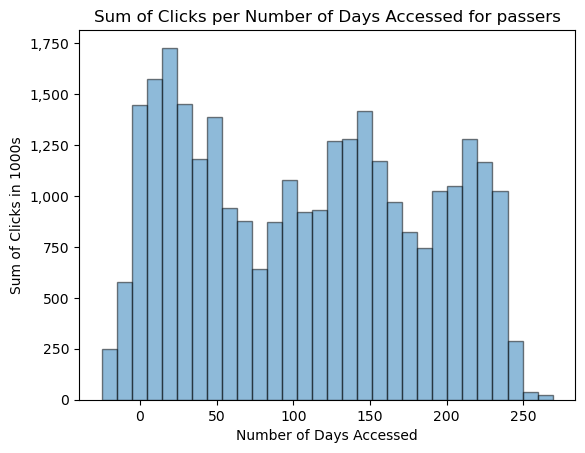

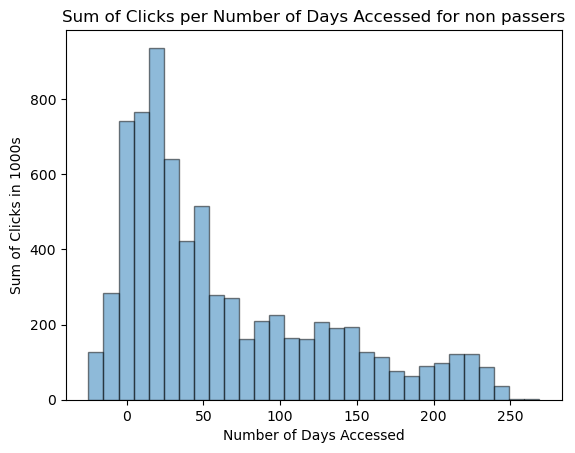

In [19]:
# Aggregate the sum of clicks by the number of days accessed
import matplotlib.ticker as ticker

# Set up the plot
plt.hist(clicks_by_pass['date'], bins=30, weights=clicks_by_pass['sum_click'], edgecolor='k', alpha=0.5, label='Date')

# Add a title and labels
plt.title('Sum of Clicks per Number of Days Accessed for passers')
plt.xlabel('Number of Days Accessed')
plt.ylabel('Sum of Clicks in 1000s')

# Set the y-axis tick labels to be in thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000):,}'))

# Show the plot
plt.show()

# Set up the plot
plt.hist(clicks_by_nonpass['date'], bins=30, weights=clicks_by_nonpass['sum_click'], edgecolor='k', alpha=0.5, label='Date')

# Add a title and labels
plt.title('Sum of Clicks per Number of Days Accessed for non passers')
plt.xlabel('Number of Days Accessed')
plt.ylabel('Sum of Clicks in 1000s')

# Set the y-axis tick labels to be in thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000):,}'))

# Show the plot
plt.show()

With this we can see that for passers and non passers the VLE usage is similar till around 40 days after that the usage for non passers drops hence it can be a major factor in the final result. 

We will now merge both the dataframes and create features for the VLE information before merging and then try to predict the final result

In [20]:
# fill the na with 0
stud_vle=stud_vle.fillna(0)
stud_vle=stud_vle.groupby(['code_module','code_presentation','id_student']).apply(
                                                                              lambda x:pd.Series(dict(dateRange=(x.date.max()-x.date.min()),
                                                                                                      sumClicks40=x[x.date<=40]['sum_click'].sum(),
                                                                                                      sumAllClicks=x.sum_click.sum(),
                                                                                                      countResources=x.id_site.count(),
                                                                                                      earlyAccess=x.date.min())))
stud_vle.head(2)

dateRange  sumClicks40  \
code_module code_presentation id_student                           
AAA         2013J             28400             249          625   
                              30268              22          281   

                                          sumAllClicks  countResources  \
code_module code_presentation id_student                                 
AAA         2013J             28400               1435             430   
                              30268                281              76   

                                          earlyAccess  
code_module code_presentation id_student               
AAA         2013J             28400               -10  
                              30268               -10

In [21]:
stud_info=stud_info.set_index(['code_module','code_presentation','id_student'])
stud_new=stud_info.merge(stud_vle,right_index=True,left_index=True,how='inner')

In [22]:
stud_new = stud_new.rename(columns={'sumClicks30': 'sumClicks40'})
stud_new.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27983 entries, ('AAA', '2013J', 28400) to ('GGG', '2014J', 2684003)
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                27983 non-null  int32 
 1   region                27983 non-null  object
 2   highest_education     27983 non-null  int64 
 3   imd_band              27983 non-null  int32 
 4   age_band              27983 non-null  int32 
 5   num_of_prev_attempts  27983 non-null  int32 
 6   studied_credits       27983 non-null  int32 
 7   disability            27983 non-null  int32 
 8   final_result          27983 non-null  object
 9   dateRange             27983 non-null  int64 
 10  sumClicks40           27983 non-null  int64 
 11  sumAllClicks          27983 non-null  int64 
 12  countResources        27983 non-null  int64 
 13  earlyAccess           27983 non-null  int64 
dtypes: int32(6), int64(6), object(2)
memory usag

In [23]:
for col in stud_new.columns:
    if stud_new[col].dtype == 'int64':
        stud_new[col] = stud_new[col].astype('int32')

In [24]:
stud_new.head()

gender                region  \
code_module code_presentation id_student                                 
AAA         2013J             28400            1              Scotland   
                              30268            1  North Western Region   
                              31604            1     South East Region   
                              32885            1  West Midlands Region   
                              38053            0                 Wales   

                                          highest_education  imd_band  \
code_module code_presentation id_student                                
AAA         2013J             28400                       3        30   
                              30268                       2        40   
                              31604                       2        60   
                              32885                       1        60   
                              38053                       2        90   

                                          age_band  num_of_prev_attempts  \
code_module code_presentation id_student                                   
AAA         2013J             28400              1                     0   
                              30268              1                     0   
                              31604              1                     0   
                              32885              0                     0   
                              38053              1                     0   

                                          studied_credits  disability  \
code_module code_presentation id_student                                
AAA         2013J             28400                    60           0   
                              30268                    60           1   
                              31604                    60           0   
                              32885                    60           0   
                              38053                    60           0   

                                         final_result  dateRange  sumClicks40  \
code_module code_presentation id_student                                        
AAA         2013J             28400              Pass        249          625   
                              30268         Withdrawn         22          281   
                              31604              Pass        274          673   
                              32885              Pass        257          601   
                              38053              Pass        277          821   

                                          sumAllClicks  countResources  \
code_module code_presentation id_student                                 
AAA         2013J             28400               1435             430   
                              30268                281              76   
                              31604               2158             663   
                              32885               1034             352   
                              38053               2445             723   

                                          earlyAccess  
code_module code_presentation id_student               
AAA         2013J             28400               -10  
                              30268               -10  
                              31604               -10  
                              32885               -10  
                              38053               -10

In [25]:
stud_new.loc[:,'final_result']=stud_new['final_result'].replace({'Withdrawn':0, 'Fail':0, 'Pass':1, 'Distinction':1}).astype('int32')
stud_new.count()

gender                  27983
region                  27983
highest_education       27983
imd_band                27983
age_band                27983
num_of_prev_attempts    27983
studied_credits         27983
disability              27983
final_result            27983
dateRange               27983
sumClicks40             27983
sumAllClicks            27983
countResources          27983
earlyAccess             27983
dtype: int64

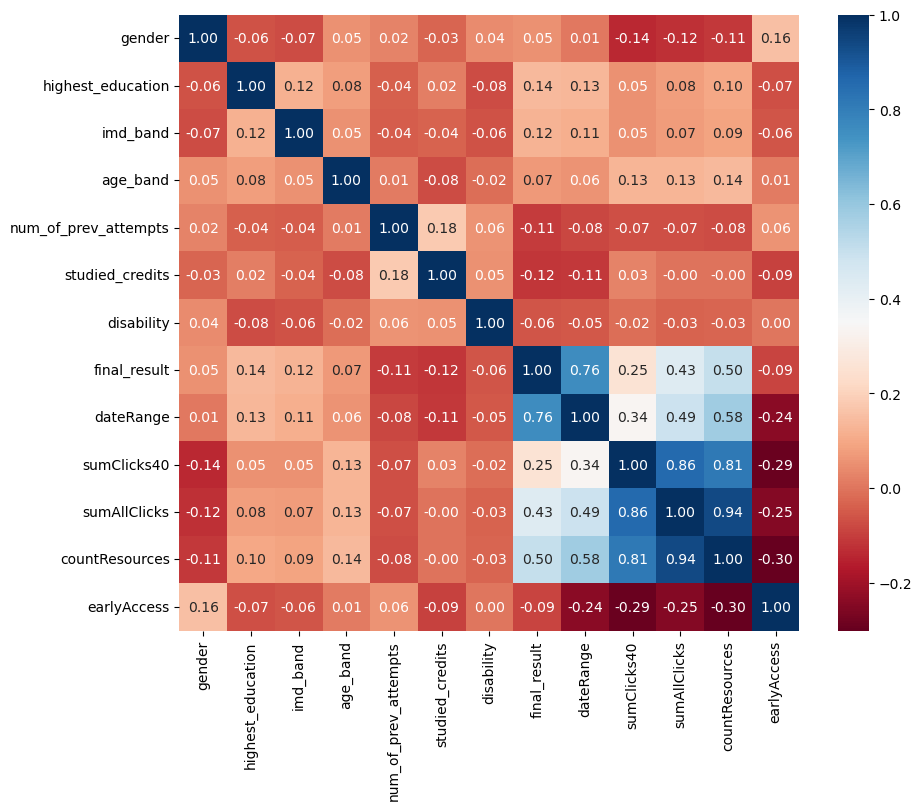

In [26]:
import seaborn as sns

# Compute the correlation matrix
corr = stud_new.corr()

# Increase the size of the plot
plt.subplots(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f')

# Show the plot
plt.show()

In [28]:
numeric_data=stud_new.drop(['final_result','age_band','region','gender','highest_education','earlyAccess'],axis=1)
numeric_data=numeric_data._get_numeric_data()
numeric_data.head()
X=numeric_data.values
y=stud_new['final_result'].values

In [29]:
numeric_data.head()

imd_band  num_of_prev_attempts  \
code_module code_presentation id_student                                   
AAA         2013J             28400             30                     0   
                              30268             40                     0   
                              31604             60                     0   
                              32885             60                     0   
                              38053             90                     0   

                                          studied_credits  disability  \
code_module code_presentation id_student                                
AAA         2013J             28400                    60           0   
                              30268                    60           1   
                              31604                    60           0   
                              32885                    60           0   
                              38053                    60           0   

                                          dateRange  sumClicks40  \
code_module code_presentation id_student                           
AAA         2013J             28400             249          625   
                              30268              22          281   
                              31604             274          673   
                              32885             257          601   
                              38053             277          821   

                                          sumAllClicks  countResources  
code_module code_presentation id_student                                
AAA         2013J             28400               1435             430  
                              30268                281              76  
                              31604               2158             663  
                              32885               1034             352  
                              38053               2445             723

In [62]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

stdScaler=StandardScaler()
stdScaler.fit(X_train)
X_train=stdScaler.transform(X_train)
X_test=stdScaler.transform(X_test)

# Set up the list of models and list of names
models = [KNeighborsClassifier(), LogisticRegression(), SVC(), RandomForestClassifier()]
model_names = ['KNN', 'Logistic Regression', 'SVM', 'Random Forest']

# Loop through the models and print their mean and standard deviation of cross-validated accuracy scores
for model, name in tqdm(zip(models, model_names), total=len(models)):
  scores = cross_val_score(model, X, y, cv=5)
  print(f'{name} Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

 25%|█████████████████████                                                               | 1/4 [00:01<00:04,  1.43s/it]

KNN Accuracy: 0.874 (+/- 0.039)


 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.04s/it]

Logistic Regression Accuracy: 0.884 (+/- 0.028)


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [01:18<00:35, 35.18s/it]

SVM Accuracy: 0.889 (+/- 0.024)


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:29<00:00, 22.43s/it]

Random Forest Accuracy: 0.893 (+/- 0.035)


We can see that all the models have over 87 percent accuracy with Random forest having the highest of over 89% accuracy.

Now lets try to refine the hyperparameters using gridsearch and again try to find the accuracy for the models


In [45]:
import warnings
from sklearn.model_selection import GridSearchCV

# Set up the KNN classifier
knn = KNeighborsClassifier()

# Set up the parameter grid
param_grid = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25,27],
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan'],
             'algorithm':['auto','ball_tree','kd_tree','brute']}

# Set up the grid search
knn_grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=10)

# Ignore warnings
warnings.filterwarnings("ignore")

# Fit the grid search object to the training data
knn_grid.fit(X_train, y_train)

# Loop through the grid search results and update the progress bar
with tqdm(total=len(param_grid['n_neighbors'])) as pbar:
    for mean_score, params in zip(knn_grid.cv_results_['mean_test_score'], knn_grid.cv_results_['params']):
        pbar.update()

# Print the best parameters and best score
print(f'Best Parameters: {knn_grid.best_params_}')
print(f'Best Score: {knn_grid.best_score_:.2f}')

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


208it [00:00, 205952.60it/s]                                                                                           

Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'distance'}
Best Score: 0.89


In [72]:
import warnings
from sklearn.model_selection import GridSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

stdScaler=StandardScaler()
stdScaler.fit(X_train)
X_train=stdScaler.transform(X_train)
X_test=stdScaler.transform(X_test)
param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500],
'max_depth': [None, 5, 10, 15, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]}

rfc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid, verbose=5
)

rfc_grid=rfc.fit(X_train, y_train)
# random random search results
print('Best random search hyperparameters are: '+str(rfc_grid.best_params_))
print('Best random search score is: '+str(rfc_grid.best_score_))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.897 total time=   0.8s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.900 total time=   0.8s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.906 total time=   0.8s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.899 total time=   0.8s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.901 total time=   0.8s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.899 total time=   1.6s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.902 total time=   1.7s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.907 

In [77]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Set up the hyperparameter grid for logistic regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Set up the grid search with Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
logr = GridSearchCV(LogisticRegression(), param_grid, cv=rskf, return_train_score=True, verbose=3)

# Fit the grid search to the data
logr.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters for logistic regression: ', logr.best_params_)
print('Best score for logistic regression: ', logr.best_score_)

# Set up the hyperparameter grid for SVM
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

# Set up the grid search with Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
svc_grid = GridSearchCV(SVC(njobs=-1), param_grid, cv=rskf, return_train_score=True, verbose=3)

# Fit the grid search to the data
svc_grid.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters for Support Vector Machine: ', svc_grid.best_params_)
print('Best score for Support Vector Machine: ', svc_grid.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10] END C=0.01, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10] END C=0.01, penalty=l2;, score=(train=0.894, test=0.893) total time=   0.0s
[CV 2/10] END C=0.01, penalty=

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

In [70]:
X_train

array([[  90,    0,  120, ...,  566,  893,  248],
       [  30,    0,   60, ...,  153, 1151,  318],
       [  50,    0,   60, ...,  111,  291,  122],
       ...,
       [  40,    0,   60, ...,  273,  421,  177],
       [  50,    0,  120, ...,   64,  329,  197],
       [  40,    0,   60, ...,  797, 2527,  652]])

In [87]:
#Set up the list of models and list of names
from sklearn.metrics import confusion_matrix
models = [KNeighborsClassifier(**knn_grid.best_params_),
LogisticRegression(**logr.best_params_),
SVC(),
RandomForestClassifier(**rfc_grid.best_params_)]
model_names = ['KNN', 'Logistic Regression', 'SVM', 'Random Forest']

#Loop through the models and print their mean and standard deviation of cross-validated accuracy scores
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    c= confusion_matrix(y_test,predictions)
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy:.3f}')
    print(c)
    print(predictions)

KNN Accuracy: 0.886
[[2751  708]
 [  88 3449]]
[0 0 1 ... 1 1 1]
Logistic Regression Accuracy: 0.892
[[2839  620]
 [ 138 3399]]
[0 0 1 ... 1 1 1]
SVM Accuracy: 0.889
[[2742  717]
 [  57 3480]]
[0 0 1 ... 1 1 1]
Random Forest Accuracy: 0.898
[[2868  591]
 [ 124 3413]]
[0 0 1 ... 1 1 1]


With this we can say that we have a model with 90 percent accuracy we can now download the model and deploy it as per the requirement.